PRactical 5 : Implementation of Convolutional Neural Network on Fashion MNIST Dataset.

In [1]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,GlobalAveragePooling2D,Flatten
from keras.datasets import fashion_mnist
from keras.models import Sequential

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

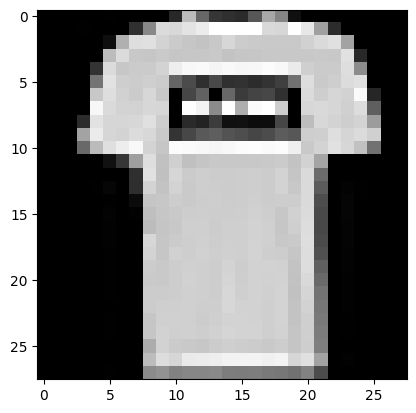

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1,:,:].reshape(28,28),cmap='gray')
plt.show()

In [6]:
y_train[0]

9

In [7]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [8]:
x_train_norm = (x_train / 255) - 0.5
x_test_norm = (x_test / 255) - 0.5

In [9]:
x_train_images = x_train_norm.reshape((x_train_norm.shape[0], 28, 28, 1))
x_test_images = x_test_norm.reshape((x_test_norm.shape[0], 28, 28, 1))

In [10]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crosseddntropy', optimizer=opt, metrics=['accuracy'])
model.summary()

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [12]:
evaluate = model.fit(x_train_images, y_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.4412 - accuracy: 0.8373
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2899 - accuracy: 0.8937
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2408 - accuracy: 0.9115
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2090 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1814 - accuracy: 0.9337
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1572 - accuracy: 0.9406
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1391 - accuracy: 0.9482
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1211 - accuracy: 0.9553
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1088 - accuracy: 0.9591
Epoch 10/10
1875/1875 [==============================] - 38s 20m

In [13]:
scores = model.evaluate(x_test_images, y_test_encoded)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 3s 10ms/step - loss: 0.3363 - accuracy: 0.9096

Accuracy: 90.96%


In [15]:
!pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for plumbum from https://files.pythonhosted.org/packages/6f/e8/a9a580d1d67825d8bdc16f3993ea58c4066769d5f8ba34caaa69a5344b39/plumbum-1.8.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/49.6 kB ? eta -:--:--
     -------- ------------------------------- 10.2/49.6 kB ? eta -:--:--
     -------- ------------------------------- 10.2/49.6 kB ? eta -:--:--
     ----------------------- -------------- 30.7/49.6 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 49.6/49.6 kB 278.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/127.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/127.0 kB ? eta -:--:--
   --------- ----------------------